In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [3]:
India= pd.read_stata('/Users/abhaindurkar/Desktop/India fertility.dta')

In [4]:
India.head(5)

,state,dist,tehs,villn,hhnum,hhmember,sc4c,sc5,sc6,sc7,...,hbjc,hbjd,hbje,hbj2,hbj3,hbj4,hbj5,hbj6,hbf6,hbevuse
0,TamilNad,Coimbato,Pollachi,1,8,4,2,mainlivg,wood,handpump,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TamilNad,Coimbato,Pollachi,1,40,4,1,seproom,wood,handpump,...,NaN,NaN,NaN,NaN,cooperat,reliable,1.0,Average,NaN,yes
2,TamilNad,Coimbato,Pollachi,1,64,4,2,seproom,wood,handpump,...,no,no,yes,noeffect,cooperat,reliable,8.0,Worse,NaN,yes
3,TamilNad,Coimbato,Pollachi,1,65,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TamilNad,Coimbato,Pollachi,1,68,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
India.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 0 to 2445
Columns: 1517 entries, state to hbevuse
dtypes: category(1295), float32(14), float64(202), int16(1), int8(3), object(2)
memory usage: 7.0+ MB


In [6]:
India.info(6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446 entries, 0 to 2445
Data columns (total 1517 columns):
state       category
dist        category
tehs        category
villn       int8
hhnum       int16
hhmember    int8
sc4c        category
sc5         category
sc6         category
sc7         category
sc7a        category
sc7bh       category
sc7bm       float64
sc8         category
sc9         category
sc10        category
sc11        category
sc12        category
sc13        category
sc14        category
erkeyer     object
emoddate    float32
ere4        float32
erg15a      category
erk6t       float32
erl7        object
ernum       float64
erstate     category
erdist      category
erteh       category
ervill      float64
erhno       float64
erwlno      float64
erday       float64
ermonth     category
erresult    category
ervisit     float64
era1h       float64
era1m       float64
erb1        category
erb2        category
erb3        category
erb4        float64
erb6a       floa

In [7]:
India.shape

(2446, 1517)

In [8]:
India.drop(['erstate','erdist','ervill','erteh', 'erhno','erkeyer'], axis=1, inplace=True)

In [9]:
India.drop(['sc4c','sc5', 'sc7bm','emoddate', 'erl7' ,'ernum', 'erb10d','erb10c','erc12'], axis=1, inplace=True)

In [10]:
India = India.rename(index=str, columns={ "erb13": "Religion", "erb14": "SC-ST", "erb14a": "Castes", "erb14b": "Tribe", "erb15": "wife_age",})

In [14]:
India.tail()

,state,dist,tehs,villn,hhnum,hhmember,sc6,sc7,sc7a,sc7bh,...,hbjc,hbjd,hbje,hbj2,hbj3,hbj4,hbj5,hbj6,hbf6,hbevuse
2441,UttPrade,Meerut,Bagpat,28,1309,10,cowdung,handpump,0,0.0,...,NaN,NaN,NaN,NaN,cooperat,reliable,8.0,Better,pregnant,no
2442,UttPrade,Meerut,Bagpat,28,1316,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2443,UttPrade,Meerut,Bagpat,28,1320,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2444,UttPrade,Meerut,Bagpat,28,1327,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2445,UttPrade,Meerut,Bagpat,28,1531,6,cowdung,handpump,0,0.0,...,NaN,NaN,NaN,NaN,cooperat,reliable,1.0,Average,NaN,yes


In [11]:
India.describe()

C:\Users\abhaindurkar\Anaconda3\New folder\envs\econ\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,villn,hhnum,hhmember,ere4,erk6t,erwlno,erday,ervisit,era1h,era1m,...,hbe7,hbe9,hbe10,hbe11,hbg6a,hbh2a,hbh7a,hbh14h,hbh14m,hbj5
count,2446.000000,2446.000000,2446.000000,494.000000,1842.000000,1941.000000,1941.000000,1941.000000,1842.000000,1842.000000,...,185.000000,444.000000,444.000000,1660.000000,116.000000,1228.000000,1660.000000,1660.000000,1660.000000,1660.000000
mean,10.031889,744.306623,5.656173,2615.967529,20360.798828,2.701700,14.808346,1.047913,12.946254,26.326819,...,1.010811,0.846847,0.738739,3.267470,2.258621,4.166124,25.389157,13.814458,25.727711,4.485542
std,8.137105,636.492414,2.826246,3427.013428,28042.371094,1.629351,8.788310,0.247195,2.114033,16.748763,...,0.820850,0.888331,0.768590,2.312432,1.165599,7.238971,22.426715,2.855665,17.620077,3.400586
min,1.000000,1.000000,1.000000,0.000000,1050.000000,1.000000,1.000000,1.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,6.000000,0.000000,0.000000
25%,3.000000,174.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.000000,517.500000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,17.000000,1262.750000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,28.000000,2480.000000,31.000000,48000.000000,568400.000000,23.000000,31.000000,3.000000,19.000000,59.000000,...,4.000000,7.000000,4.000000,12.000000,9.000000,99.000000,99.000000,21.000000,59.000000,9.000000


In [19]:
#This data set includes fertility and health status, demographics and information of households in india. 
# The data contains both eligible respondents(females) and their husbands answers to the questions on fertility on the above questions
# In order to analysize which varibales best explain the girl child mortality
# My dependent varibale is death rate of girl child, I wish to explore the data 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() ## We are going to normalize



In [13]:
India_use= India[['erc10','sc6','sc7','sc9','sc8','sc14','erg15a','erb2','erb4','erb6a','erb6a1','erb11a', 
           'erb12','erb12a','erb17','erb17b','erb17c','erc1','erc3','erc4','erc9','erc8',
           'erc11','erc13','erc13a','erb13bs','erb13bi','erd1c3', 'erd1c2','erc25g','erc25b',
           'e2e1e','e1e1g','e1e1e','e1e1c','e2e1e','hba3a','hba2', 'hba4','hba6','hba7','hba9a',
           'hba11','hba14','hba14a','hba15','hba15a','hbb1a','hbb1d','hbb1e','hbb1a2','hbb1d2',
           'hbc8b','hbd1','hbd2','hbd2a','hbd2b','hbd3a','hbd4a1','hbd4a2','hbd4a4','hbd4d1',
           'hbd4d2','hbd4e1','hbd4e2','hbd4e4','hbd4f1','hbd4f4','hbd4g1','hbd4i1','hbd4i2']]


In [14]:
India_use.head()

,erc10,sc6,sc7,sc9,sc8,sc14,erg15a,erb2,erb4,erb6a,...,hbd4d1,hbd4d2,hbd4e1,hbd4e2,hbd4e4,hbd4f1,hbd4f4,hbd4g1,hbd4i1,hbd4i2
0,NaN,wood,handpump,nofacili,no,so-so,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,wood,handpump,nofacili,no,so-so,1001.0,13,4.0,NaN,...,yes,yes,yes,yes,no,no,no,yes,no,yes
2,NaN,wood,handpump,nofacili,no,verygood,1000.0,10,5.0,NaN,...,yes,yes,yes,yes,no,yes,no,yes,yes,yes
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
'sc6','sc7','sc9','sc8','erg15a','erb2','erb4','erb11a', 
           'erb12','erb12a','erb17','erb17b','erb17c','erc1','erc3','erc4','erc9','erc8',
           'erc11','erc13','erc13a','erb13bs','erb13bi','erd1c3', 'erd1c2','erc25g','erc25b',
           'e2e1e','e1e1g','e1e1e','e1e1c','e2e1e','hba3a','hba2', 'hba4','hba6','hba7','hba9a',
           'hba11','hba14','hba14a','hba15','hba15a','hbb1a','hbb1d','hbb1e','hbb1a2','hbb1d2',
           'hbc8b','hbd1','hbd2','hbd2a','hbd2b','hbd3a','hbd4a1','hbd4a2','hbd4a4','hbd4d1',
           'hbd4d2','hbd4e1','hbd4e2','hbd4e4','hbd4f1','hbd4f4','hbd4g1','hbd4i1','hbd4i2'

In [20]:
India_use = India_use.rename(index=str, columns={ "erc10": "girls_death","erb4":"wife_edu","erb13":"Religion","sc6":"fuel_used","sc7":"source_water","sc9":"tiolet_type","sc8":"boil_water","erb2":"dowry_amount",})

In [51]:
India_use = India_use.rename(index=str, columns={ "erb12": "edu_wifemom","erc9":"boys_death","erb17":"number_marriagewife","erb17b":"age_marriagewife","erc2":"sons","erc4":"daughters","erc8":"dead_children",})

In [52]:
India_use = India_use.rename(index=str, columns={ "erc11": "total_children","erc13":"stillbirth","erb13a":"abortions","erc13bs":"spontaneos_abortions","erc13bi":"induced_abortions","erd1c3":"Used_pills",})

In [53]:
India_use.head()

,girls_death,fuel_used,source_water,tiolet_type,boil_water,sc14,erg15a,dowry_amount,wife_edu,erb6a,...,hbd4d1,hbd4d2,hbd4e1,hbd4e2,hbd4e4,hbd4f1,hbd4f4,hbd4g1,hbd4i1,hbd4i2
0,NaN,wood,handpump,nofacili,no,so-so,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,wood,handpump,nofacili,no,so-so,1001.0,13,4.0,NaN,...,yes,yes,yes,yes,no,no,no,yes,no,yes
2,NaN,wood,handpump,nofacili,no,verygood,1000.0,10,5.0,NaN,...,yes,yes,yes,yes,no,yes,no,yes,yes,yes
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


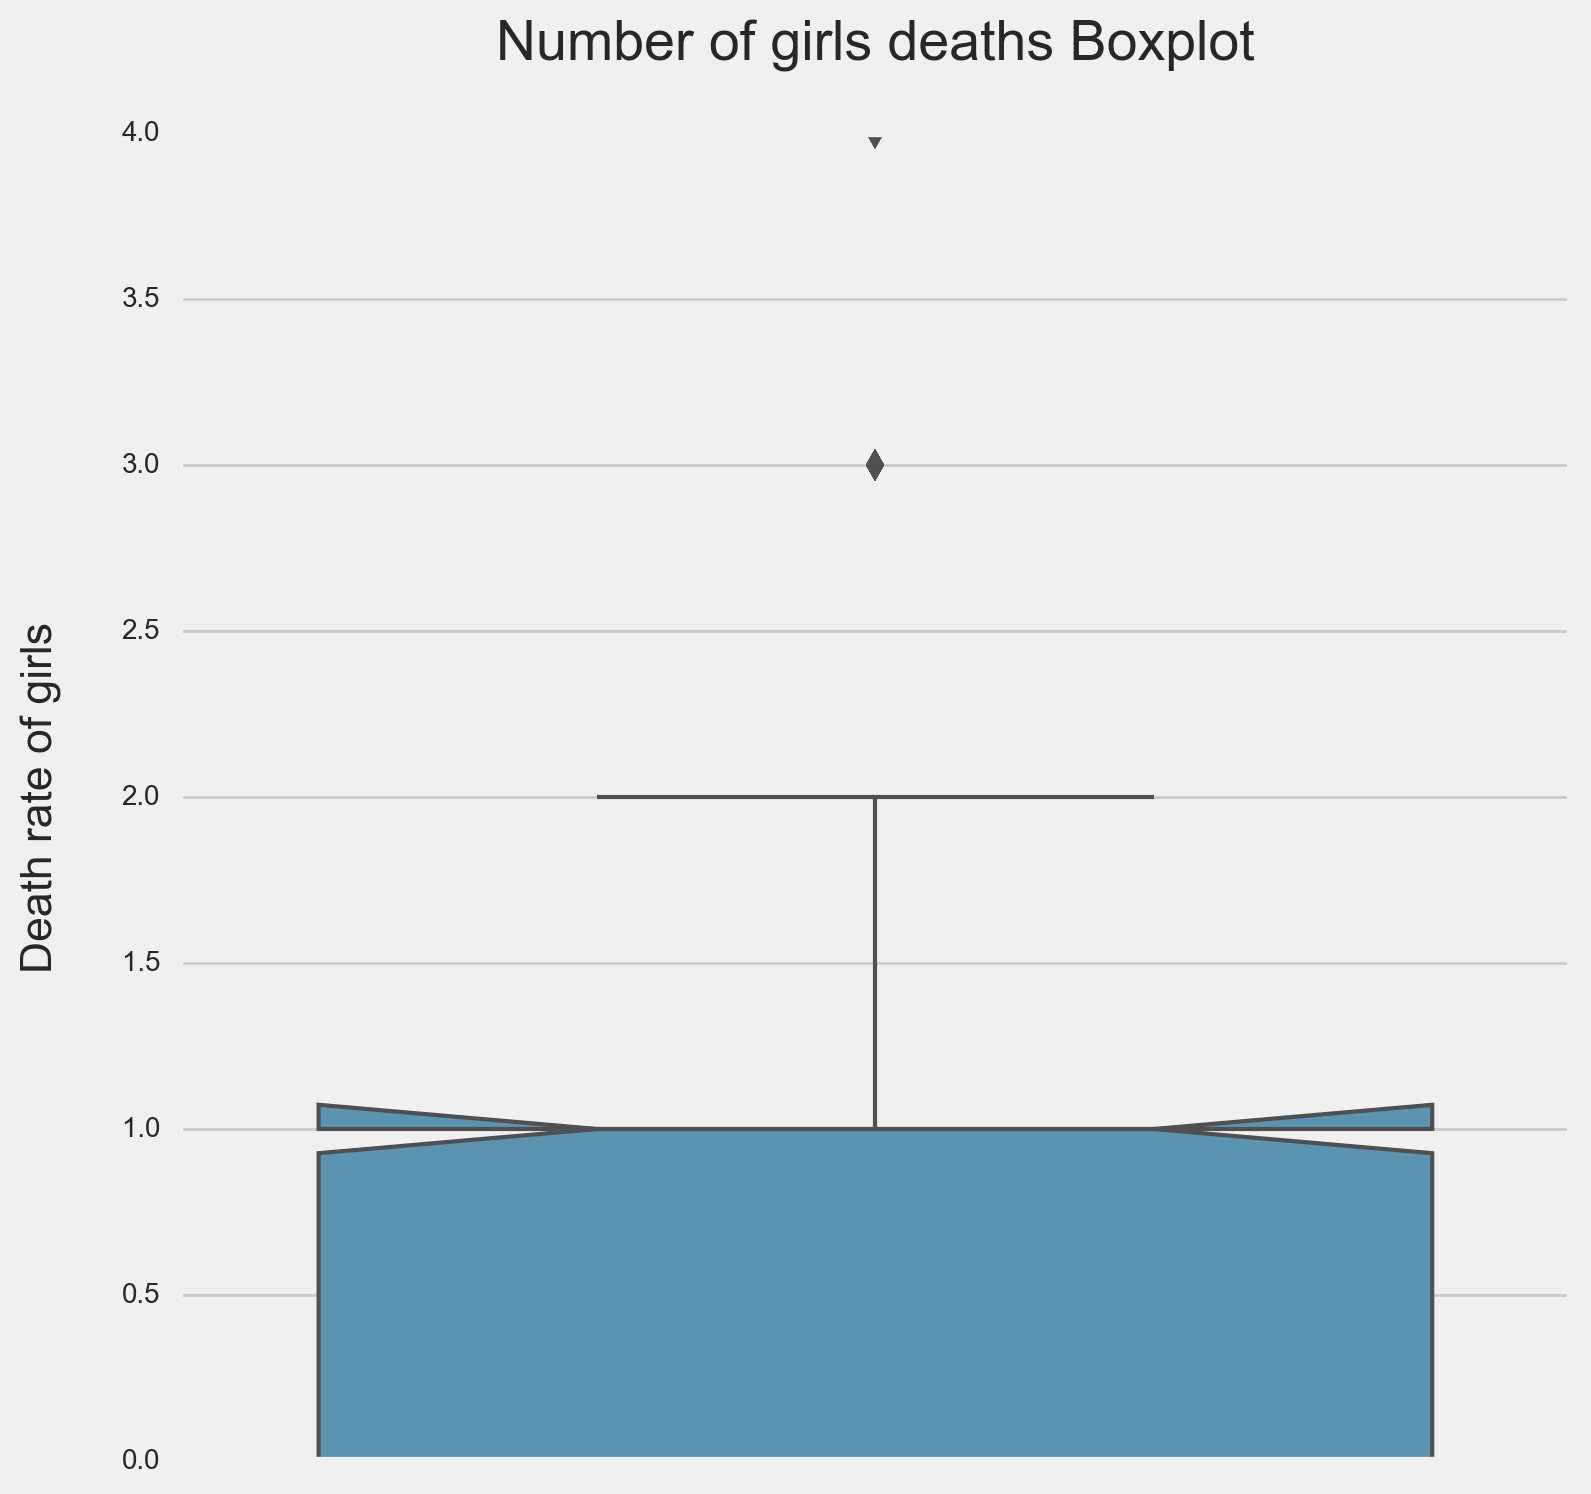

In [54]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

sns.boxplot(India_use.girls_death, orient='v',
            fliersize=8, linewidth=1.5, notch=True,
            saturation=0.5, ax=ax)

ax.set_ylabel('Death rate of girls\n', fontsize=16)
ax.set_title('Number of girls deaths Boxplot\n', fontsize=20)

plt.show()


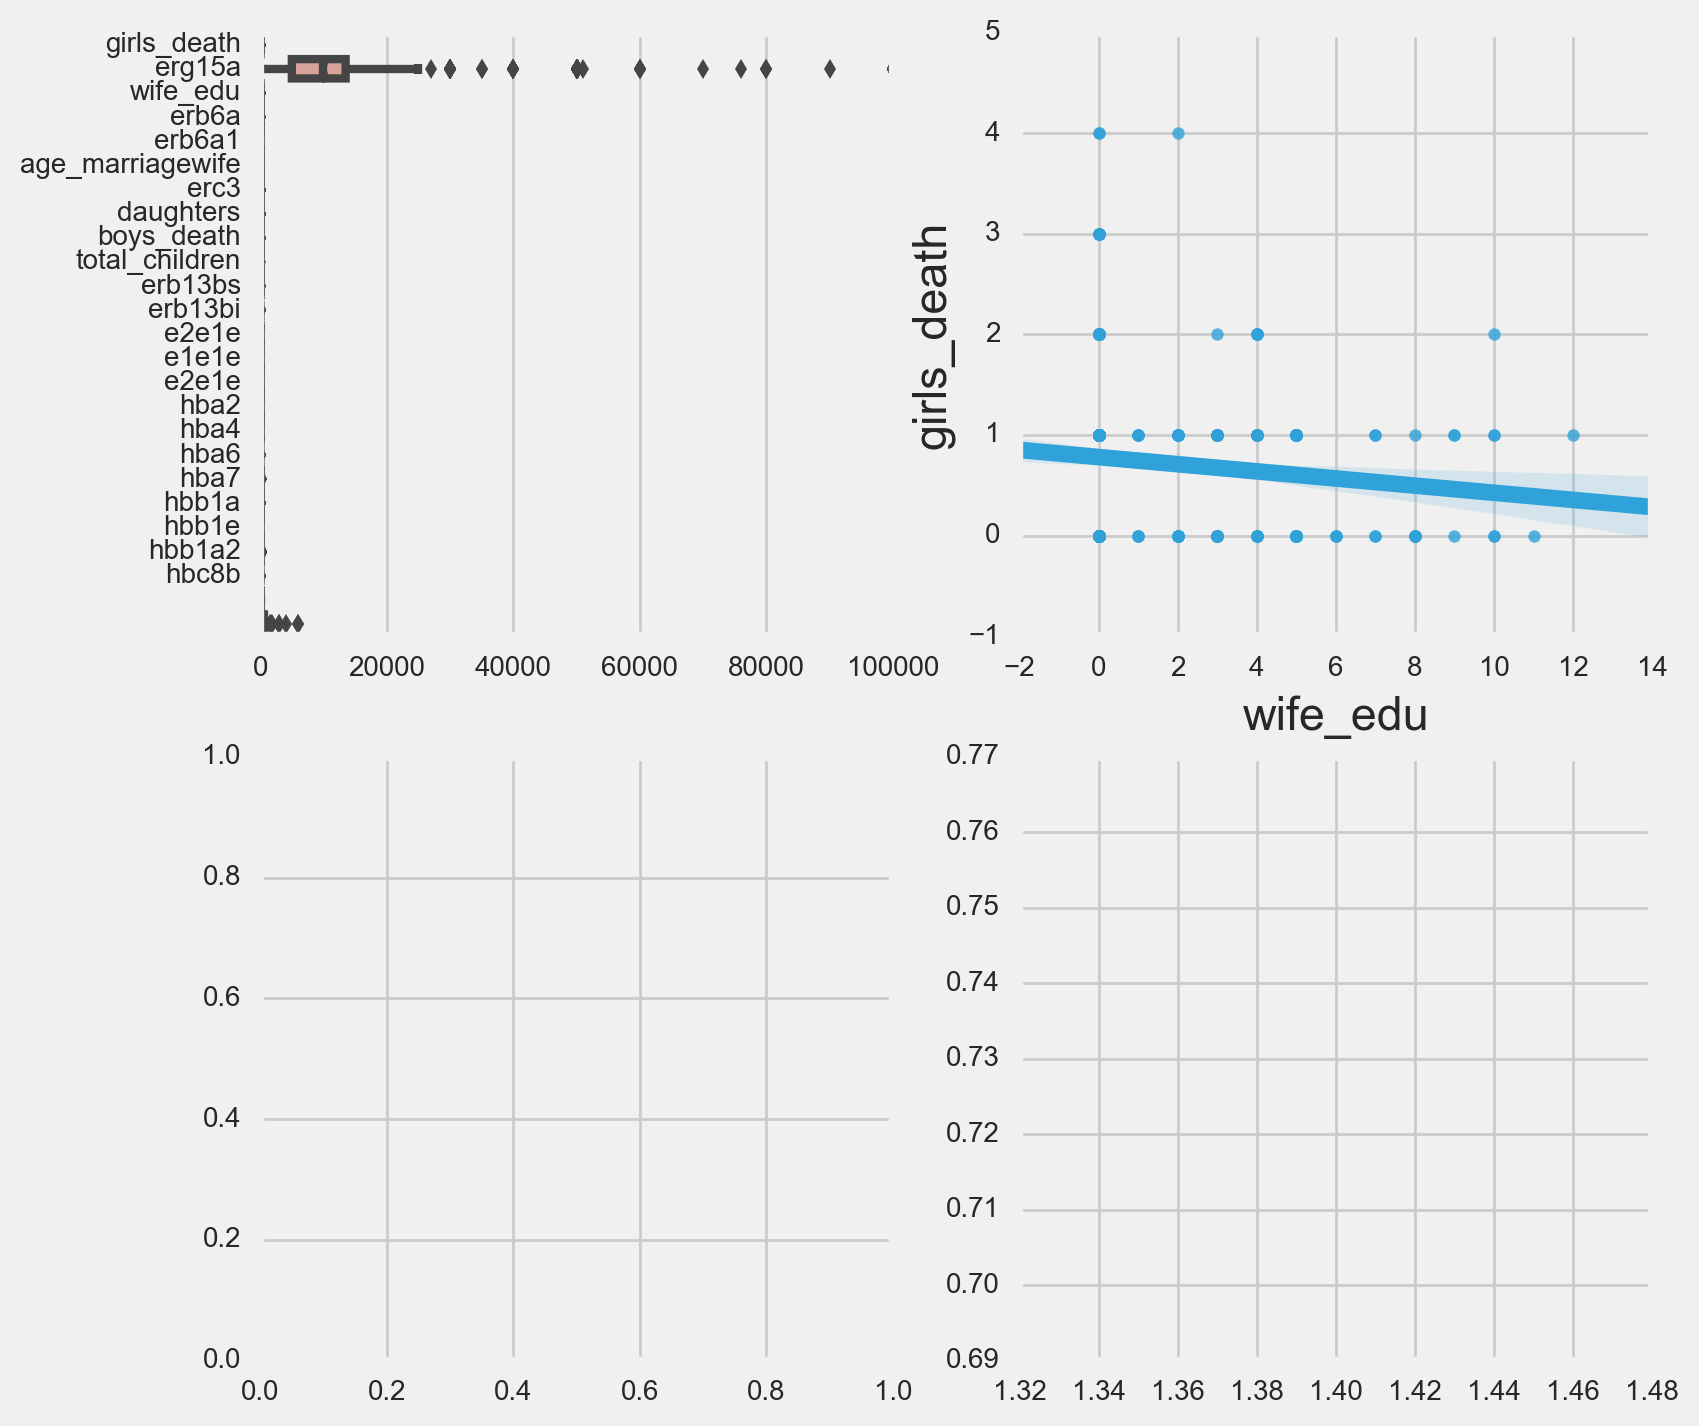

In [55]:
fig, axarr = plt.subplots(2, 2, figsize=(8,8),
                         sharex=False, sharey=False)
#ax = fig.gca()

axarr[0,0] = sns.boxplot(data=India_use, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=axarr[0,0])

axarr[0,1] = sns.regplot(India_use.wife_edu, India_use.girls_death, ax=axarr[0,1])

plt.show()


In [56]:
#Here we can see that there is negative correlation between mother's education and number of girl's deaths.

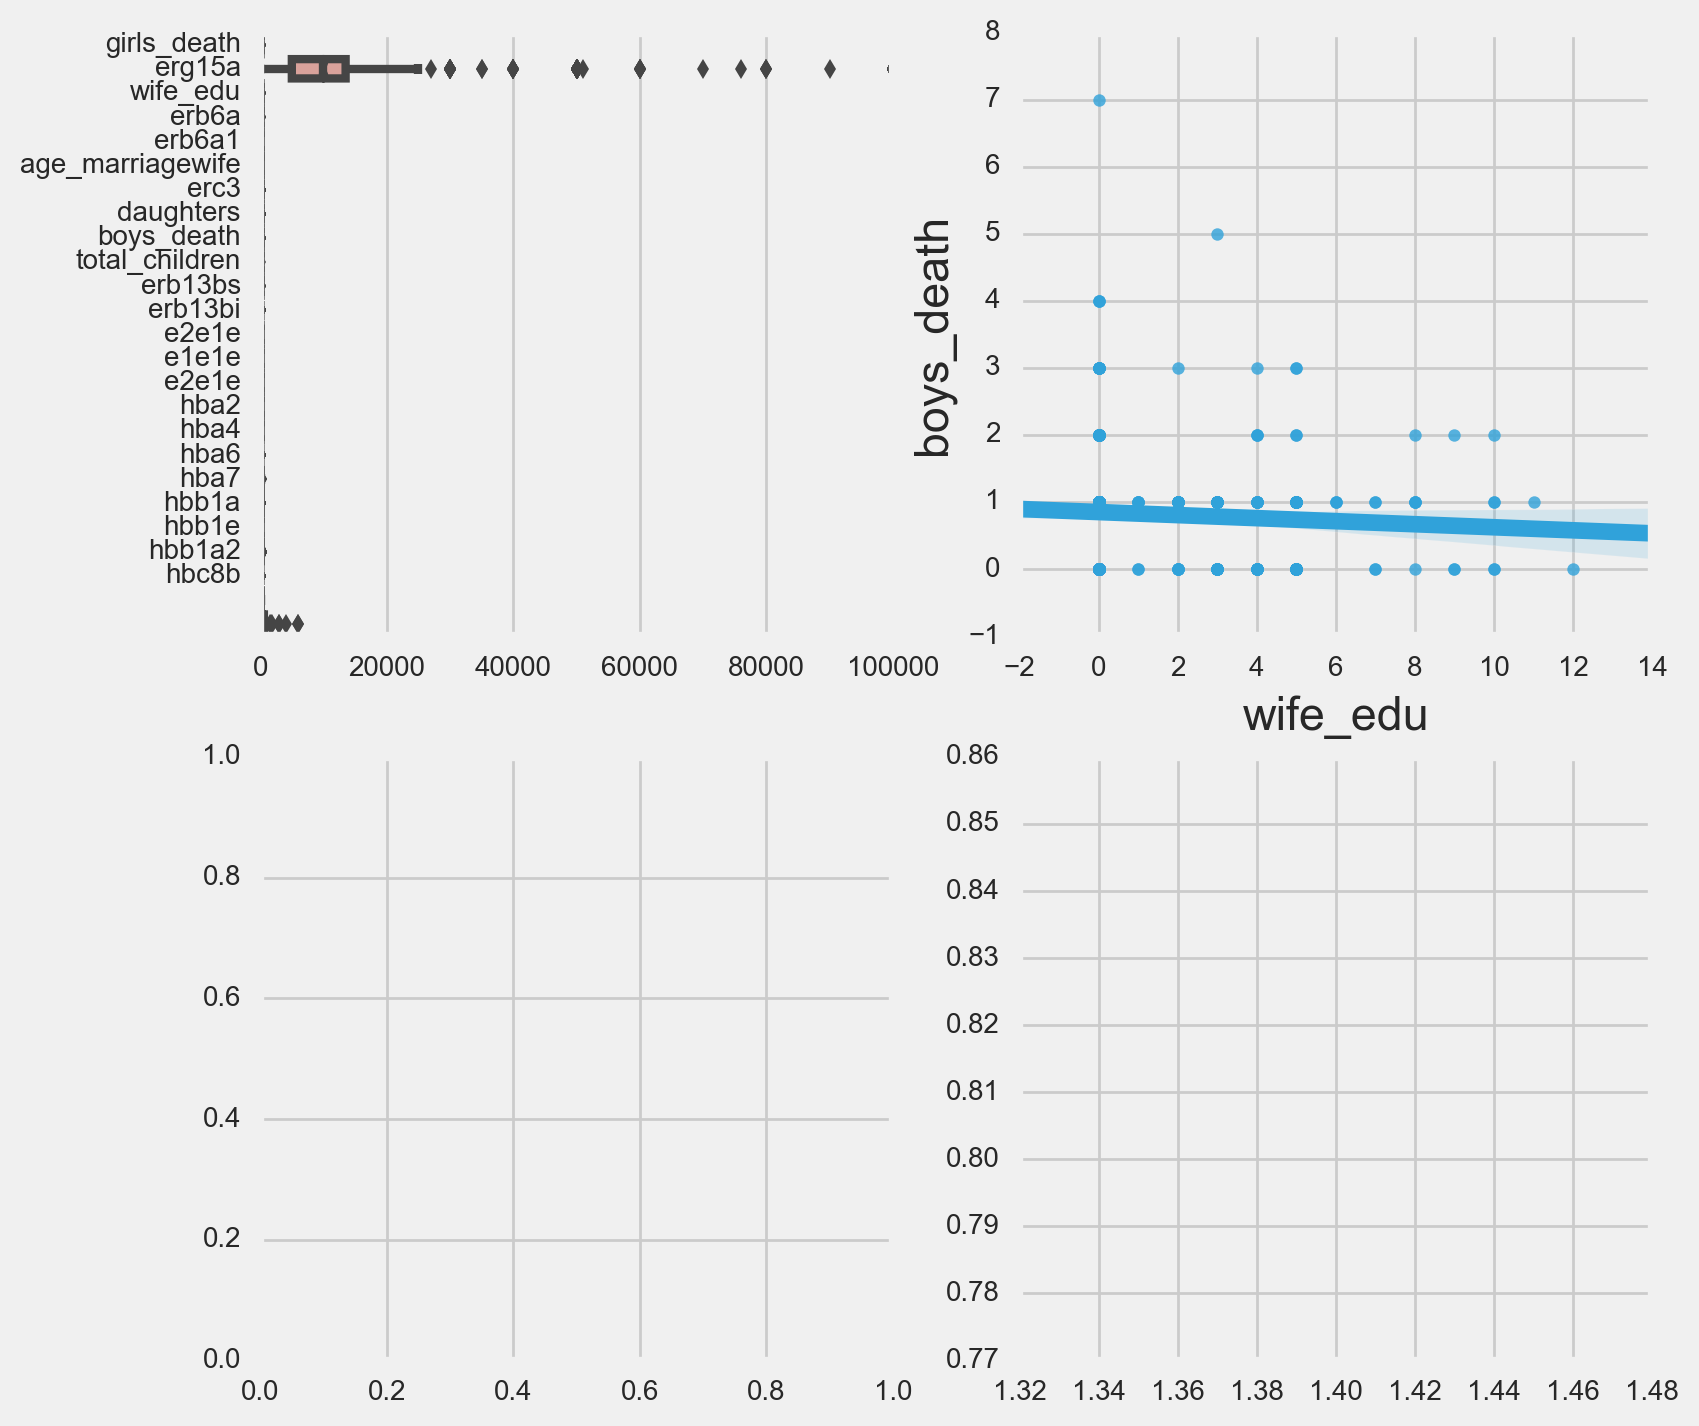

In [57]:
fig, axarr = plt.subplots(2, 2, figsize=(8,8),
                         sharex=False, sharey=False)
#ax = fig.gca()

axarr[0,0] = sns.boxplot(data=India_use, orient='h',
            fliersize=5, linewidth=3, notch=True, 
            saturation=0.5, ax=axarr[0,0])

axarr[0,1] = sns.regplot(India_use.wife_edu, India_use.boys_death, ax=axarr[0,1])

plt.show()


In [58]:
India_use.corr()

,girls_death,wife_edu,erb6a,erb6a1,age_marriagewife,erc3,daughters,boys_death,total_children,erb13bs,...,e2e1e,e1e1e,e2e1e,hba2,hba4,hba7,hbb1a,hbb1e,hbb1a2,hbc8b
girls_death,1.000000,-0.112336,0.017521,-0.022749,-0.340723,-0.016693,0.039011,-0.232055,0.324850,0.025201,...,0.009179,-0.219014,0.009179,0.049052,0.100250,-0.045289,0.016092,0.081979,-0.037746,-0.151177
wife_edu,-0.112336,1.000000,NaN,0.269868,0.598898,-0.168112,-0.125668,-0.063980,-0.264063,-0.175046,...,-0.337626,-0.063234,-0.337626,-0.113897,-0.065325,0.438061,-0.140867,-0.037854,-0.113066,0.256593
erb6a,0.017521,NaN,1.000000,NaN,-0.239679,-0.042061,-0.011410,0.152032,0.032489,-0.039466,...,0.033356,0.081684,0.033356,-0.069946,0.010127,-0.090758,0.082796,-0.040746,0.066902,0.080977
erb6a1,-0.022749,0.269868,NaN,1.000000,0.175108,-0.062662,-0.016765,0.058899,-0.064426,-0.054372,...,-0.124304,0.011154,-0.124304,0.025396,0.019521,0.078478,-0.106408,-0.116555,0.032829,-0.096016
age_marriagewife,-0.340723,0.598898,-0.239679,0.175108,1.000000,-0.203295,-0.344875,0.082564,-0.356559,-0.783322,...,-0.572584,0.755993,-0.572584,0.001046,0.060983,-0.309996,0.155941,0.135651,-0.327636,NaN
erc3,-0.016693,-0.168112,-0.042061,-0.062662,-0.203295,1.000000,-0.029478,0.004200,0.618415,0.104191,...,-0.030878,-0.082678,-0.030878,0.027812,0.332951,-0.061533,-0.030289,0.063975,0.012278,0.073237
daughters,0.039011,-0.125668,-0.011410,-0.016765,-0.344875,-0.029478,1.000000,-0.086422,0.576753,0.066361,...,0.027820,-0.009103,0.027820,0.013398,0.249407,-0.033878,-0.036753,0.020272,0.067520,-0.047997
boys_death,-0.232055,-0.063980,0.152032,0.058899,0.082564,0.004200,-0.086422,1.000000,0.285136,-0.019791,...,0.092425,-0.045954,0.092425,-0.020763,0.126529,-0.127776,0.067950,-0.002889,0.108794,0.132604
total_children,0.324850,-0.264063,0.032489,-0.064426,-0.356559,0.618415,0.576753,0.285136,1.000000,0.085306,...,0.032365,-0.083222,0.032365,0.035580,0.551173,-0.122678,-0.029284,0.051878,0.060599,0.053750
erb13bs,0.025201,-0.175046,-0.039466,-0.054372,-0.783322,0.104191,0.066361,-0.019791,0.085306,1.000000,...,-0.001688,-0.174462,-0.001688,-0.145765,0.097404,-0.040031,-0.049436,0.123603,0.031164,-0.047510


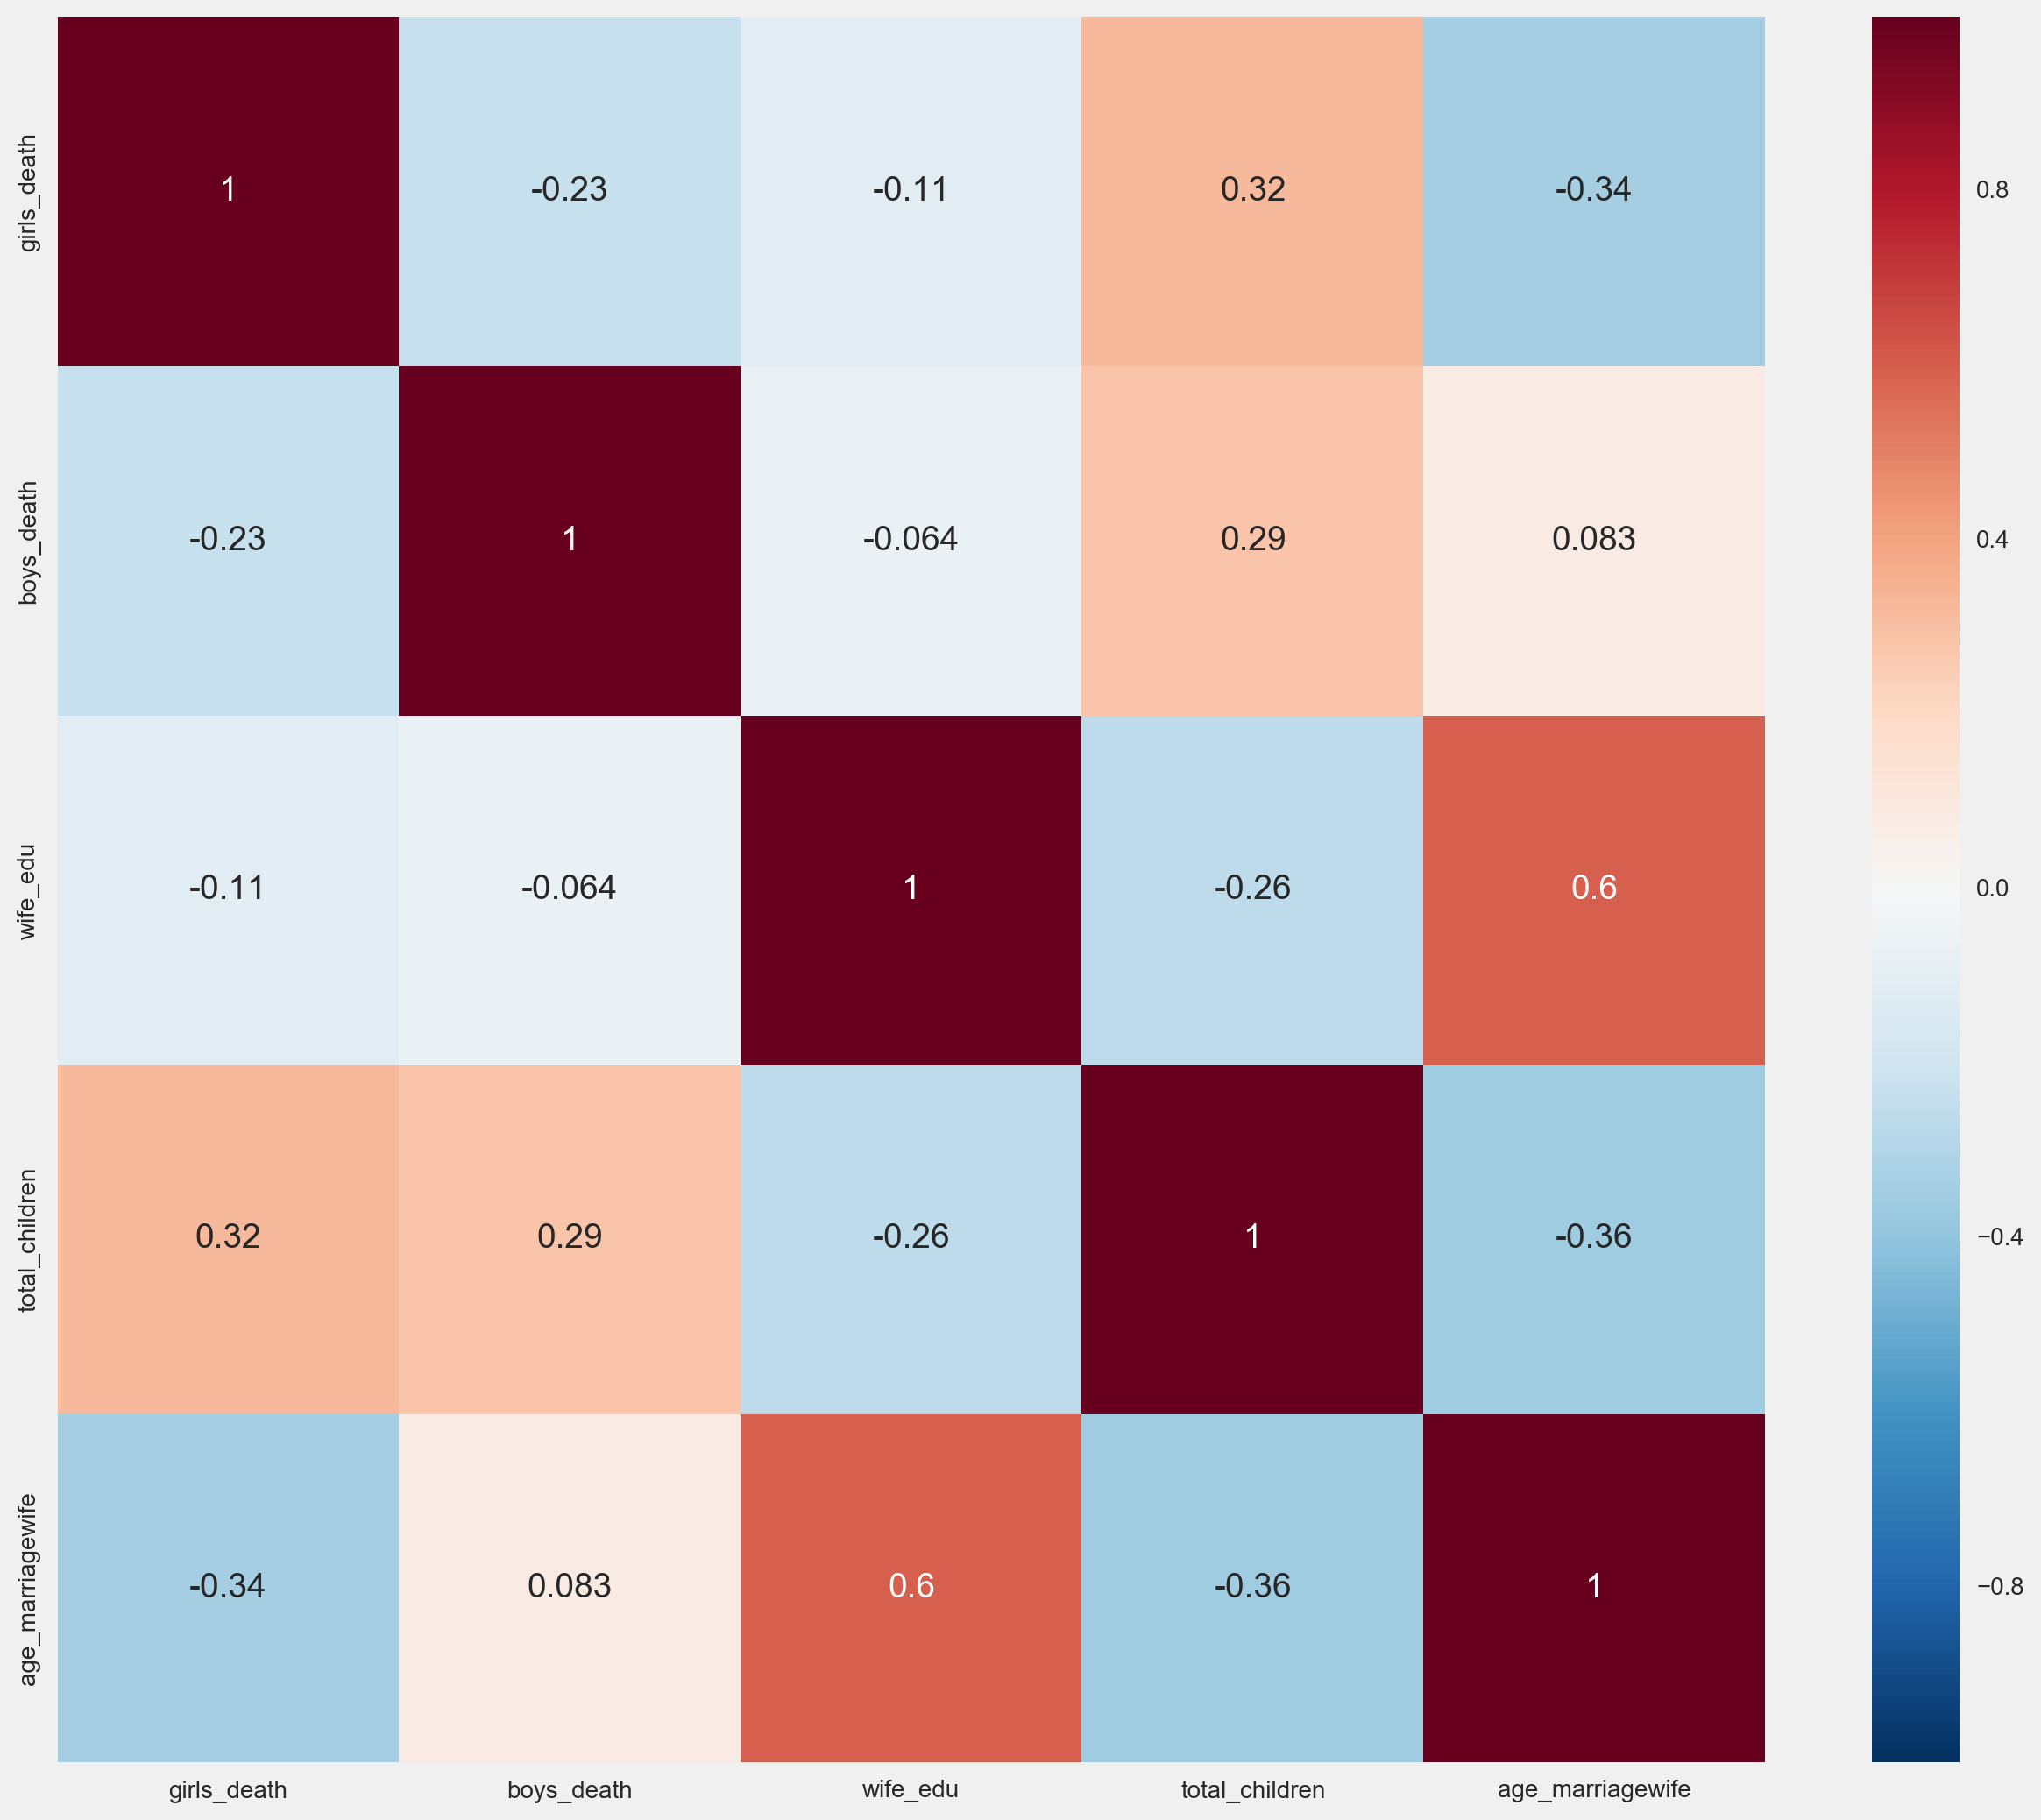

In [61]:
fig = plt.figure(figsize=(14,12))
ax = fig.gca()
sns.heatmap(India_use[['girls_death','boys_death','tiolet_type','wife_edu', 'source_water','total_children','dowry_amount','age_marriagewife','fuel_used']].corr(),annot=True, ax=ax)
plt.show()

In [62]:
# age at marriage is negative corrrelated with girls death. Also total number of children are negatively correlated with age at marriage.